# Урок 1. Алгоритм линейной регрессии. Градиентный спуск.

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

Смоделируем работу градиентного спуска при помощи Numpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## Пример задачи<a class="anchor" id="example"></a><center>

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

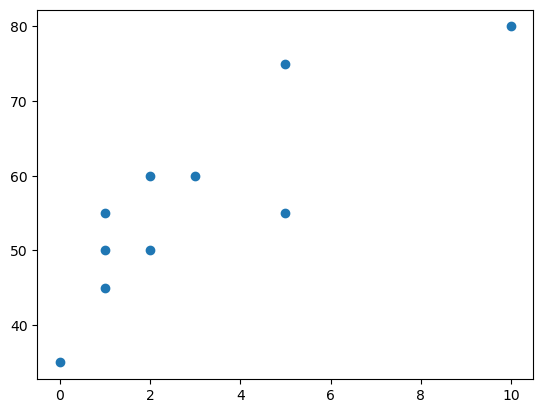

In [4]:
plt.scatter(X[:, 1], y);

Уравнение прямой: $y = a*x + b$

### Метод наименьших квадратов (МНК)

$$w = (X^{T}X)^{-1}X^{T}y.$$


### Посмотрим веса

In [5]:
W_analytical = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
W_analytical

array([45.0625,  3.8125])

In [6]:
y_pred_analytical = W_analytical[0] * X[:, 0] + W_analytical[1] * X[:, 1]
y_pred_analytical = X @ W_analytical

In [7]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

NameError: name 'y_pred1' is not defined

In [ ]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

In [9]:
calc_mae(y, y_pred_analytical), calc_mse(y, y_pred_analytical)

(5.7875, 43.96875)

### Градиентный спуск

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

1. Инициализация w

2. Цикл по k = 1,2,3,...:

    * $w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

    * Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


In [10]:
W = np.random.normal(size=(X.shape[1]))
W

array([-0.2042612 ,  0.13830741])

In [11]:
eta = 0.02 # величина шага

In [12]:
X.shape,  W.shape

((10, 2), (2,))

In [13]:
n = len(y)
dQ = 2/n * X.T @ (X @ W - y) # градиент функции ошибки
dQ

array([-112.57867796, -396.52311537])

In [14]:
grad = eta * dQ
grad

array([-2.25157356, -7.93046231])

In [15]:
print(f'previous weights', W)
W = W - grad
print(f'new weights', W)

previous weights [-0.2042612   0.13830741]
new weights [2.04731236 8.06876971]


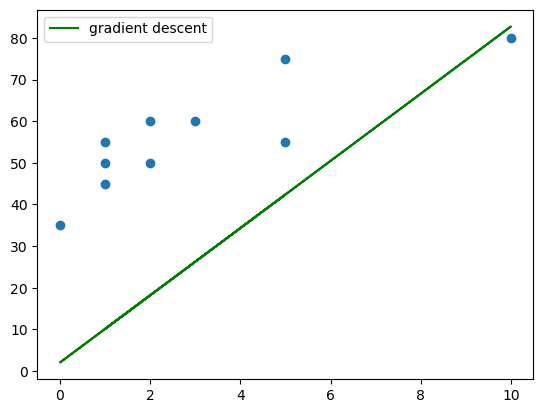

In [16]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

### Домашнее задание <a class="anchor" id="hw"></a><center>

1. Подберите скорость обучения (eta) и количество итераций

In [17]:
n = X.shape[0]
eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


### Подберем alpha задав ее в определеном диапазоне

In [18]:
n = X.shape[1]
alphas = np.arange(0.0001, 0.1, 0.001)
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rates = {alphas} \
       \nInitial weights = {W} \n')
for alpha in alphas:
    print('Значение скорости обучения alpha - ',alpha)
    for i in range(100):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * X[:, k] @ (y_pred - y))
        if i % 10 == 0:
            alpha /= 1.1
            print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rates = [0.0001 0.0011 0.0021 0.0031 0.0041 0.0051 0.0061 0.0071 0.0081 0.0091
 0.0101 0.0111 0.0121 0.0131 0.0141 0.0151 0.0161 0.0171 0.0181 0.0191
 0.0201 0.0211 0.0221 0.0231 0.0241 0.0251 0.0261 0.0271 0.0281 0.0291
 0.0301 0.0311 0.0321 0.0331 0.0341 0.0351 0.0361 0.0371 0.0381 0.0391
 0.0401 0.0411 0.0421 0.0431 0.0441 0.0451 0.0461 0.0471 0.0481 0.0491
 0.0501 0.0511 0.0521 0.0531 0.0541 0.0551 0.0561 0.0571 0.0581 0.0591
 0.0601 0.0611 0.0621 0.0631 0.0641 0.0651 0.0661 0.0671 0.0681 0.0691
 0.0701 0.0711 0.0721 0.0731 0.0741 0.0751 0.0761 0.0771 0.0781 0.0791
 0.0801 0.0811 0.0821 0.0831 0.0841 0.0851 0.0861 0.0871 0.0881 0.0891
 0.0901 0.0911 0.0921 0.0931 0.0941 0.0951 0.0961 0.0971 0.0981 0.0991]        
Initial weights = [1.  0.5] 

Значение скорости обучения alpha -  0.0001
Iteration #0: W_new = [1.054  0.6885], MSE = 3047.75
Iteration #10: W_new = [1.51756012 2.25361947], MSE = 2439.04
Iteration #20: W_new = [1.90070677 3.46897648]

C:\Users\user\AppData\Local\Temp\ipykernel_17120\551712401.py:6: RuntimeWarning: overflow encountered in square
  err = np.mean((y - y_pred)**2)
C:\Users\user\AppData\Local\Temp\ipykernel_17120\2492404708.py:13: RuntimeWarning: overflow encountered in matmul
  W[k] -= alpha * (1/n * 2 * X[:, k] @ (y_pred - y))


Iteration #50: W_new = [nan nan], MSE = nan
Iteration #60: W_new = [nan nan], MSE = nan
Iteration #70: W_new = [nan nan], MSE = nan
Iteration #80: W_new = [nan nan], MSE = nan
Iteration #90: W_new = [nan nan], MSE = nan
Значение скорости обучения alpha -  0.042100000000000005
Iteration #0: W_new = [nan nan], MSE = nan
Iteration #10: W_new = [nan nan], MSE = nan
Iteration #20: W_new = [nan nan], MSE = nan
Iteration #30: W_new = [nan nan], MSE = nan
Iteration #40: W_new = [nan nan], MSE = nan
Iteration #50: W_new = [nan nan], MSE = nan
Iteration #60: W_new = [nan nan], MSE = nan
Iteration #70: W_new = [nan nan], MSE = nan
Iteration #80: W_new = [nan nan], MSE = nan
Iteration #90: W_new = [nan nan], MSE = nan
Значение скорости обучения alpha -  0.043100000000000006
Iteration #0: W_new = [nan nan], MSE = nan
Iteration #10: W_new = [nan nan], MSE = nan
Iteration #20: W_new = [nan nan], MSE = nan
Iteration #30: W_new = [nan nan], MSE = nan
Iteration #40: W_new = [nan nan], MSE = nan
Iteratio

Iteration #30: W_new = [nan nan], MSE = nan
Iteration #40: W_new = [nan nan], MSE = nan
Iteration #50: W_new = [nan nan], MSE = nan
Iteration #60: W_new = [nan nan], MSE = nan
Iteration #70: W_new = [nan nan], MSE = nan
Iteration #80: W_new = [nan nan], MSE = nan
Iteration #90: W_new = [nan nan], MSE = nan
Значение скорости обучения alpha -  0.0921
Iteration #0: W_new = [nan nan], MSE = nan
Iteration #10: W_new = [nan nan], MSE = nan
Iteration #20: W_new = [nan nan], MSE = nan
Iteration #30: W_new = [nan nan], MSE = nan
Iteration #40: W_new = [nan nan], MSE = nan
Iteration #50: W_new = [nan nan], MSE = nan
Iteration #60: W_new = [nan nan], MSE = nan
Iteration #70: W_new = [nan nan], MSE = nan
Iteration #80: W_new = [nan nan], MSE = nan
Iteration #90: W_new = [nan nan], MSE = nan
Значение скорости обучения alpha -  0.0931
Iteration #0: W_new = [nan nan], MSE = nan
Iteration #10: W_new = [nan nan], MSE = nan
Iteration #20: W_new = [nan nan], MSE = nan
Iteration #30: W_new = [nan nan], MS

In [30]:
## Посмотрим и alpha и количество итераций

n = X.shape[0]

alphas = np.arange(0.001, 0.1, 0.01)
iterations = np.arange(300, 1000, 10)

best_error = np.inf
best_params = {}

for alpha in alphas:
    for iteration in iterations:
        W = np.array([1, 0.5]) # случайные веса
        curr_alpha = alpha
        
        for i in range(iteration):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            for k in range(W.shape[0]):
                W[k] -= curr_alpha * (1/n * 2 * X[:, k] @ (y_pred - y))
            if i % 10 == 0:
                curr_alpha /= 1.1
   
        if err < best_error:
            best_error = err
            best_params = {
                'alpha': alpha,
                'iteration': i}
print(f'Лучшая ошибка {best_error} с параметрами {best_params}')

Лучшая ошибка 43.968780920945456 с параметрами {'alpha': 0.09099999999999998, 'iteration': 989}


In [47]:
def grid_search(alphas, iterations):
    
    n = X.shape[0]
    best_error = np.inf
    best_params = {}
    
    for alpha in alphas:
        for iteration in iterations:
            W = np.array([1, 0.5])
            curr_alpha = alpha
            
            for i in range(iteration):
                y_pred = np.dot(X, W)
                err = calc_mse(y, y_pred)
                for k in range(W.shape[0]):
                    W[k] -= curr_alpha  * (1/n * 2 * X[:, k] @ (y_pred - y))
                if i % 10 == 0:
                    curr_alpha /= 1.1
   
                if err < best_error:
                    best_error = err
                    best_params = { 'alpha': alpha, 'iteration': i}
                
    return(f'Лучшие параметры {best_params}')
    

In [48]:
grid_search([0.001, 0.01], [990,1000])

"Лучшие параметры {'alpha': 0.01, 'iteration': 999}"

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

### Решение

In [49]:
n = X.shape[0]
eta = 1e-2 
n_iter = 100

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    dQ = 2/n * X.T @ (y_pred - y)
    W -= eta * dQ
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


3*. Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

In [50]:
n = X.shape[0]

alpha = 1e-2 
epsilon = 1e-6
iter_num = 0

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
weight_dist = np.inf

while weight_dist > epsilon:
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)

    W_new = W - alpha * (1/n * 2 * np.dot(X.T, y_pred - y))
    weight_dist = np.linalg.norm(W_new - W, ord=2)
    W = W_new.copy()
    
    if iter_num % 10 == 0:
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {(err)}')
    iter_num += 1

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.6534565814403
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.0253200502414
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.2425289713664
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.6639230494043
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.57641516768024
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.7212205667205
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.21773784067534
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.50023052373837
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.26510994861874
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.42704441959268
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08241692977836
Iteration #120: W_new = [31.17545797  6.3

In [51]:
def find_local_minimum(alpha):
    n = X.shape[0]
    epsilon = 1e-6 # оч маленькое число служет меткой отсутсвия изменений весов при спуске 
    iter_num = 0

    W = np.array([1, 0.5])
    print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')
    weight_dist = np.inf

    while weight_dist > epsilon:
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W_new = W - alpha * (1/n * 2 * np.dot(X.T, y_pred - y))
        weight_dist = np.linalg.norm(W_new - W, ord=2)# смотрим разницу между весами 
        W = W_new.copy()
    
        if iter_num % 10 == 0:
            print(f'Iteration #{iter_num}: W_new = {W}, MSE = {err}')
        iter_num += 1

In [52]:
find_local_minimum(0.01)

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.6534565814403
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.0253200502414
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.2425289713664
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.6639230494043
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.57641516768024
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.7212205667205
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.21773784067534
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.50023052373837
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.26510994861874
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.42704441959268
Iteration #110: W_new = [29.84305573  6.57231156], MSE = 155.08241692977836
Iteration #120: W_new = [31.17545797  6.3

## Дополнительные материалы

1. [Обучение с учителем. Обучение без учителя. Обучение с подкреплением. Видео](https://youtu.be/ku2oPMPht2I)
2. [Вывод аналитической формулы решения уравнения линейной регрессии](https://habr.com/ru/company/ods/blog/323890/#metod-naimenshih-kvadratov) (см. пункт 1.2)
3. [Математическое описание метода градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0)
4. [Документация NumPy](https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.html)
5. [Метрики для задачи регрессии. Видео](https://youtu.be/vh2smjQyhp8)

## Summary

* Линейная регрессия - простой, но зачастую эффективный, способ приближать вещественную целевую переменную через линейную комбинацию признаков
* Решение регрессии - МНК, можно решать аналитически, но на практике - градиентный спуск (GD, Gradient Descent)
* MSE удобна для градиентного спуска, так как дифференцируема
* Максимальное качество градиентного спуска достигается малыми шагами и большим кол-вом итераций

### Определения
*Машинное обучение*

**Машинное обучение** — дисциплина, заключающаяся в извлечении знаний из известных данных.

**Признак** — это индивидуальное измеримое свойство или характеристика наблюдения.

**Обучающая выборка** — набор структурированных данных, используемый для обучения моделей.

**Обучение с учителем** — это направление машинного обучения, объединяющее алгоритмы и методы построения моделей на основе множества примеров, содержащих пары "известный вход - известный выход".

**Обучение без учителя** — направление машинного обучения, в которой для коррекции параметров обучаемой модели не используется целевая функция. Иными словами, в обучающих примерах при обучении без учителя не нужно иметь заранее заданные выходы модели.

**Обучение с подкреплением** — раздел машинного обучения, изучающий поведение интеллектуальных агентов, действующих в некоторой среде и принимающих решения.
___________

_Линейные модели_

**Линейные модели** — такие модели, которые сводятся к суммированию значений признаков с некоторыми весами

**Линейная регрессия** — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости.

**Метод наименьших квадратов** — способ вычисления весов линейной модели путем минимизации среднеквадратичного отклонения.
___________

_Градиентный спуск_

**Градиент функции** — $n$-мерный вектор из частных производных. Задает направление наискорейшего роста функции. $$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

**Градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента.